In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Load the preprocessed datasets and print the shapes
df_train = pd.read_csv("../data/train_MOFs.csv")
df_dev = pd.read_csv("../data/val_MOFs.csv")
df_test = pd.read_csv("../data/test_MOFs.csv")

print(df_train.shape)
print(df_dev.shape)
print(df_test.shape)

(259540, 9)
(32442, 9)
(32444, 9)


In [6]:
# Separate the features and labels from all of the datasets
X_train = df_train.copy()
y_train = X_train.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

X_dev = df_dev.copy()
y_dev = X_dev.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

X_test = df_test.copy()
y_test = X_test.pop('CO2_uptake_P0.15bar_T298K [mmol/g]')

### LINEAR REGRESSION

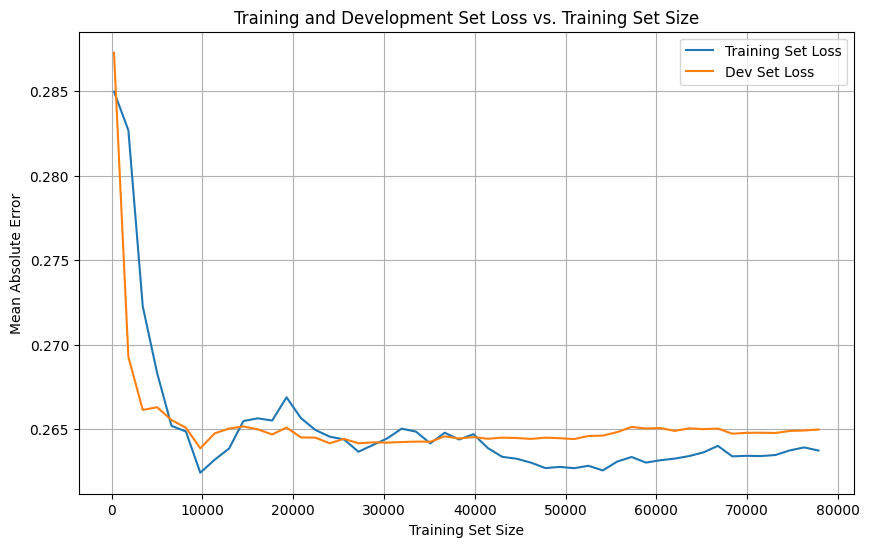

In [9]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_lr = LinearRegression()
    model_lr.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_lr.predict(X_train_subset)
    y_dev_pred = model_lr.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Test the linear model from the previous cell and evaluate with MAE
y_test_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
print(mae_lr)

NameError: name 'model_lr' is not defined

### GRADIENT BOOST

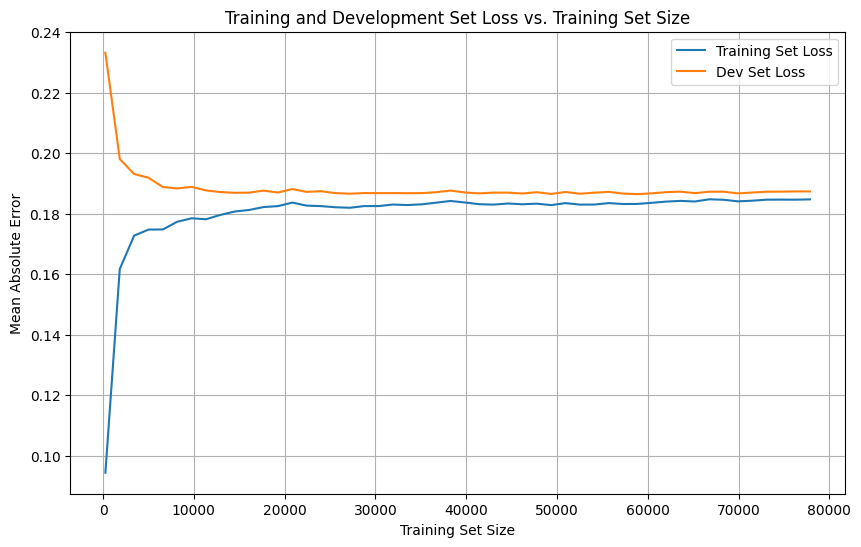

In [11]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model.predict(X_train_subset)
    y_dev_pred = model.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()


In [12]:
# Test the GB model from the previous cell and evaluate with MAE
y_test_pred_gb = model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
print(mae_gb)

0.1866652463136224


### RANDOM FOREST

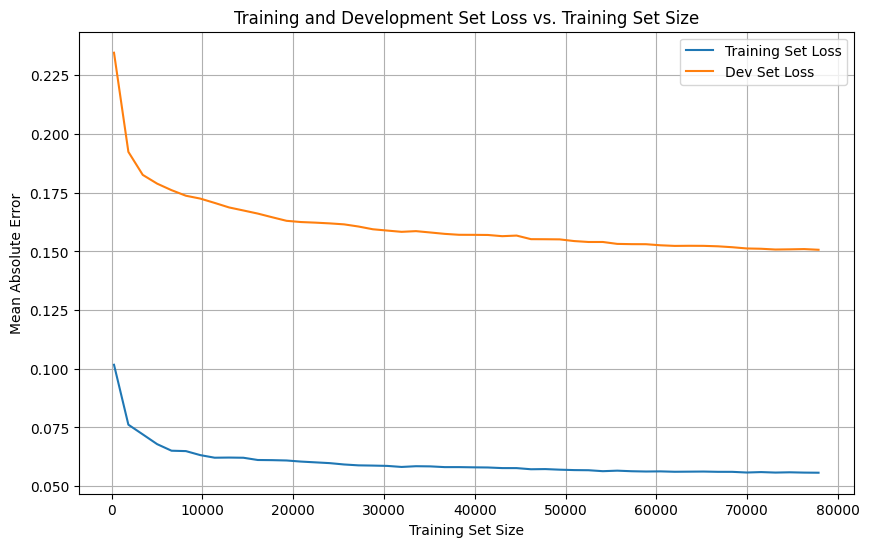

In [21]:

# Initialize lists to store the error values for different training set sizes
train_errors = []
dev_errors = []
train_sizes = np.linspace(0.001, 0.3, 50)

# Train the model on different sizes of the training set
for train_size in train_sizes:
    # Sample a fraction of the training data
    X_train_subset = X_train.sample(frac=train_size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Initialize and train the model
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train_subset, y_train_subset)

    # Calculate training and development errors
    y_train_pred = model_rf.predict(X_train_subset)
    y_dev_pred = model_rf.predict(X_dev)

    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    dev_errors.append(mean_absolute_error(y_dev, y_dev_pred))
    #print(f"Train size: {train_size * len(X_train):.0f} samples")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_sizes) * len(X_train), train_errors, label="Training Set Loss")
plt.plot(np.array(train_sizes) * len(X_train), dev_errors, label="Dev Set Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Development Set Loss vs. Training Set Size")
plt.legend()
plt.grid()
plt.show()

In [14]:
# Test the RF model from the previous cell and evaluate with MAE
y_test_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
print(mae_rf)

0.14891570722551603


In [15]:
# Print the results from the models that were trained without hyperparameter-tuning
print('MAE for LinearRegression on test set', mae_lr)
print('MAE for GradientBoostRegressor on test set', mae_gb)
print('MAE for RandomForestRegressor on test set', mae_rf)

MAE for LinearRegression on test set 0.26302476224386995
MAE for GradientBoostRegressor on test set 0.1866652463136224
MAE for RandomForestRegressor on test set 0.14891570722551603


### LINEAR REGRESSION ON FULL DATASET

In [118]:
# Train a linear regression model on all data, 300k rows
model_full_lr = LinearRegression()
model_full_lr.fit(X_train, y_train) 

# Predict on all the three datasets
model_pred_train_lr = model_full_lr.predict(X_train)
model_pred_dev_lr = model_full_lr.predict(X_dev)
model_pred_test_lr = model_full_lr.predict(X_test)

print(f"train_error: {mean_absolute_error(y_train, model_pred_train_lr)}")
print(f"dev_error: {mean_absolute_error(y_dev, model_pred_dev_lr)}")
print(f"test_error: {mean_absolute_error(y_test, model_pred_test_lr)}")

train_error: 0.26467966244649505
dev_error: 0.26526655275646255
test_error: 0.26331405462543045


In [30]:
# Save the model as a .pkl file
joblib.dump(model_full_lr, 'model_full_lr.pkl')

['model_full_lr.pkl']

### RANDOMIZED SEARCH

Random Forest

In [9]:
# Define the rf parameter grid for hyperparameter tuning
random_grid_rf = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': [None, 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 200]}

In [7]:
# Extract 10% of the data from the train set to complete hyperparameter-tuning on
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]
print(X_train_subset.shape)
print(y_train_subset.shape)

(25954, 8)
(25954,)


In [10]:
# Run the hyperparameter-tuning
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid_rf,
                               n_iter = 10,
                               cv = 5,
                               verbose=2,
                               scoring = "neg_mean_absolute_error",
                               random_state=42)
# Fit the random search model
rf_random.fit(X_train_subset, y_train_subset)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  14.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [11]:
# Print the best parameters
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}


In [119]:
# Predict on the train and test set and print the results
train_pred_full = rf_random.best_estimator_.predict(X_train)
test_pred_full = rf_random.best_estimator_.predict(X_test)
print(f"train_error: {mean_absolute_error(y_train, train_pred_full)}")
print(f"test_error : {mean_absolute_error(y_test, test_pred_full)}")

train_error: 0.1521418022493421
test_error : 0.15891265593884502


In [18]:
# Save the model as a .pkl file
joblib.dump(rf_random.best_estimator_, 'model_rf.pkl')

['model_rf.pkl']

### GRADIENT BOOST

In [13]:
# Define the grid of hyperparameters to search
hyperparameter_grid_gb = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 50, None],
    'min_samples_leaf': [1, 2, 4] ,
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]}

In [14]:
gbr = GradientBoostingRegressor()

# Set up the random search with 5-fold cross validation
gb_random = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid_gb,
            cv=5,
            n_iter=10,
            verbose = 2,
            random_state=42)

gb_random.fit(X_train_subset,y_train_subset)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 5.1min
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 4.9min
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 4.9min
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 7.0min
[CV] END learning_rate=0.2, loss=huber, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=46.5min
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=68.4min
[CV] END

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 5, 10, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [16]:
# Print the best parameters
print(gb_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'loss': 'huber', 'learning_rate': 0.1}


In [120]:
# Predict on the train and test set and print the results
train_pred_full_gb = gb_random.best_estimator_.predict(X_train)
test_pred_full_gb = gb_random.best_estimator_.predict(X_test)
print(f"train_error: {mean_absolute_error(y_train, train_pred_full_gb)}")
print(f"test_error : {mean_absolute_error(y_test, test_pred_full_gb)}")

train_error: 0.14638704124450416
test_error : 0.1602261428886086


In [20]:
# Save the model as a .pkl file
joblib.dump(gb_random.best_estimator_, 'model_gb.pkl')

['model_gb.pkl']

### Error plots Gradient Boost

Text(0.5, 1.0, 'Test Errors')

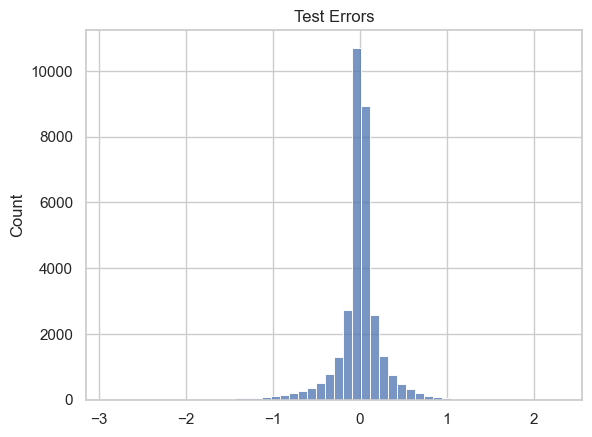

In [121]:
import seaborn as sns

errors = []
# Calculate the scale of the errors and append to a list
for i, pred in enumerate(test_pred_full_gb):
    errors.append(pred-y_test[i])

# Plot the errors as a hitogram
sns.histplot(errors, bins=50)
plt.title('Test Errors')


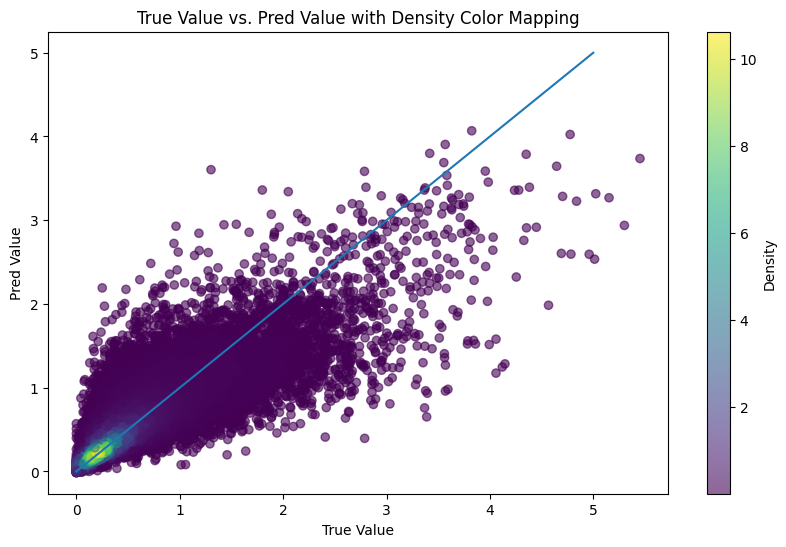

In [92]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test, test_pred_full_gb])
z = gaussian_kde(xy)(xy)

# Create a scatter plot with density color mapping
plt.figure(figsize=(10, 6))
sc = plt.scatter(y_test, test_pred_full_gb, c=z, cmap='viridis', alpha=0.6)
plt.plot([0,5], [0,5])
plt.colorbar(sc, label='Density')
plt.xlabel('True Value')
plt.ylabel('Pred Value')
plt.title('True Value vs. Pred Value with Density Color Mapping')
plt.show()

Text(0.5, 0, 'CO2 Uptake')

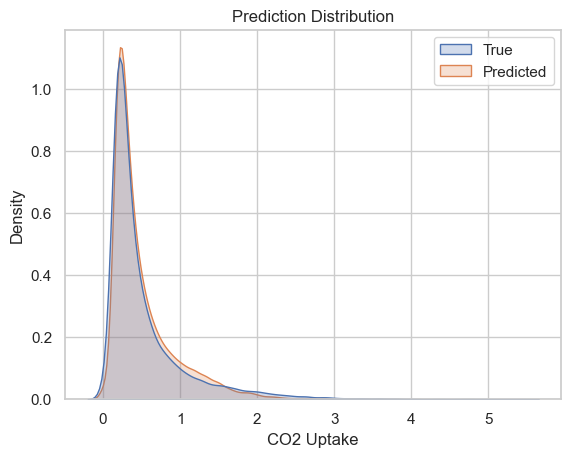

In [117]:
true_values = y_test
pred_values = test_pred_full_gb

df = {'True': y_test, 'Predicted': pred_values}

# KDE Plot Overlay using seaborn
sns.kdeplot(data=df, fill=True)

plt.title('Prediction Distribution')
plt.xlabel('CO2 Uptake')

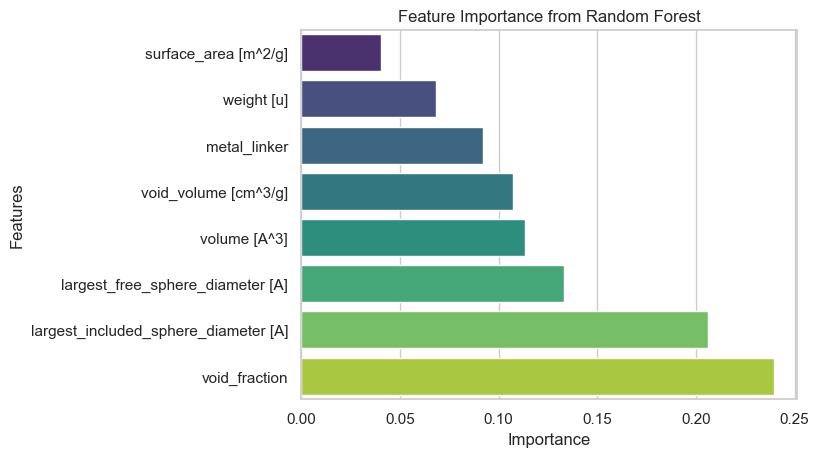

In [139]:
# Extract the feature importance from the best model and sort them in ascending order
feature_importances = rf_random.best_estimator_.feature_importances_
sorted_indices = feature_importances.argsort()

# Plot the feature importance
sns.barplot(
    x=feature_importances[sorted_indices],
    y=df_train.columns[sorted_indices],
    palette="viridis"
)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


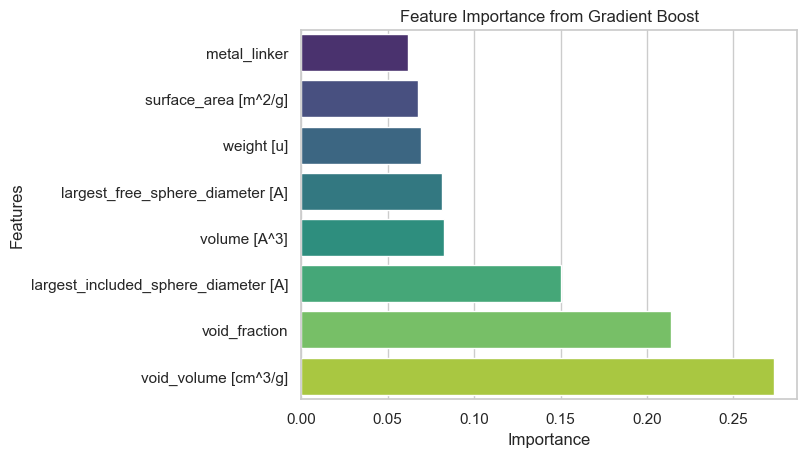

In [141]:
# Extract the feature importance from the best model and sort them in ascending order

feature_importances_gb = gb_random.best_estimator_.feature_importances_
sorted_indices_gb = feature_importances_gb.argsort()

# Plot the feature importance

sns.barplot(
    x=feature_importances_gb[sorted_indices_gb],
    y=df_train.columns[sorted_indices_gb],
    palette="viridis"
)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Gradient Boost")
plt.show()